## Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import os

## Libraries for Image 

In [2]:
import matplotlib.pyplot as plt
import cv2
import PIL
from PIL import Image

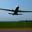

In [3]:
PIL.Image.open("C:\\Users\\amish\\Downloads\\Fake-AI-generated-Image-Detection-main\\Fake-AI-generated-Image-Detection-main\\real-and-ai\\train\\FAKE\\5992.jpg")


In [4]:
image = cv2.imread("C:\\Users\\amish\\Downloads\\Fake-AI-generated-Image-Detection-main\\Fake-AI-generated-Image-Detection-main\\real-and-ai\\train\\FAKE\\5992.jpg")
image.shape

(32, 32, 3)

In [5]:
train_path = "C:\\Users\\amish\\Downloads\\Fake-AI-generated-Image-Detection-main\\Fake-AI-generated-Image-Detection-main\\real-and-ai\\train"
test_path = "C:\\Users\\amish\\Downloads\\Fake-AI-generated-Image-Detection-main\\Fake-AI-generated-Image-Detection-main\\real-and-ai\\test"

## Defining a funciton to get input and output arrays 

In [6]:

def get_X_and_y(path):

    X = []
    y = []

    fake_path = os.path.join(path, 'FAKE')
    real_path = os.path.join(path, 'REAL')

    print("No.of FAKE images present : ", len(os.listdir(fake_path)))
    print("No.of REAL images present : ", len(os.listdir(real_path)))

    for file in os.listdir(fake_path):
        img_path = os.path.join(fake_path, file)
        img = cv2.imread(img_path)
        resized = cv2.resize(img, (32,32)) /255
        X.append(resized)
        y.append(0)

    for file in os.listdir(real_path):
        img_path = os.path.join(real_path, file)
        img = cv2.imread(img_path)
        resized = cv2.resize(img, (32,32)) / 255
        X.append(resized)
        y.append(1)

    X = np.array(X)
    y = np.array(y)
    print("No.of images present in X : ", len(X))

    return X, y


### Extracting X_train and y_train for training

In [7]:
X_train , y_train = get_X_and_y(train_path)

No.of FAKE images present :  50000
No.of REAL images present :  50000
No.of images present in X :  100000


### Extracting X_test and y_test for testing

In [8]:
X_test , y_test = get_X_and_y(test_path)

No.of FAKE images present :  10000
No.of REAL images present :  10000
No.of images present in X :  20000


#### Checking the shape of each image

In [9]:
X_train[0].shape, y_train[0]

((32, 32, 3), 0)

## Designing a model for prediction

#### Importing **"keras"** for CNN

In [10]:
import keras
import tensorflow as tf
from tensorflow.keras import models , layers

In [11]:
model = models.Sequential([
    layers.Conv2D(filters = 80 , kernel_size = (3,3),activation = 'relu',input_shape= (32,32,3)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters = 40 , kernel_size = (3,3),activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters = 20 , kernel_size = (3,3),activation = 'relu'),
    layers.MaxPool2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(10,activation = 'relu'),
    layers.Dense(2,activation = 'sigmoid'),
                         ])

model.compile(
    optimizer = 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
             )

model.fit(X_train,y_train, epochs = 2)


Epoch 1/2
3125/3125 [==============================] - 130s 41ms/step - loss: 0.3829 - accuracy: 0.8274
Epoch 2/2
3125/3125 [==============================] - 127s 41ms/step - loss: 0.2618 - accuracy: 0.8928


In [12]:
model.evaluate(X_test,y_test)

625/625 [==============================] - 9s 15ms/step - loss: 0.2273 - accuracy: 0.9090


[0.22730082273483276, 0.9090499877929688]

In [13]:
y_pred_prob  = model.predict(X_test)

625/625 [==============================] - 9s 14ms/step


In [14]:
y_pred_prob[:5]

array([[0.96966326, 0.23719618],
       [0.91922027, 0.4099505 ],
       [0.85201555, 0.50165457],
       [0.9814065 , 0.16873571],
       [0.92752284, 0.30953562]], dtype=float32)

In [15]:
y_pred = [np.argmax(i) for i in y_pred_prob]
y_pred[:5]

[0, 0, 0, 0, 0]

## Classification Report

In [16]:
from sklearn.metrics import classification_report

print('Classification Report     : \n\n\n' , classification_report(y_test,y_pred))

Classification Report     : 


               precision    recall  f1-score   support

           0       0.92      0.90      0.91     10000
           1       0.90      0.92      0.91     10000

    accuracy                           0.91     20000
   macro avg       0.91      0.91      0.91     20000
weighted avg       0.91      0.91      0.91     20000



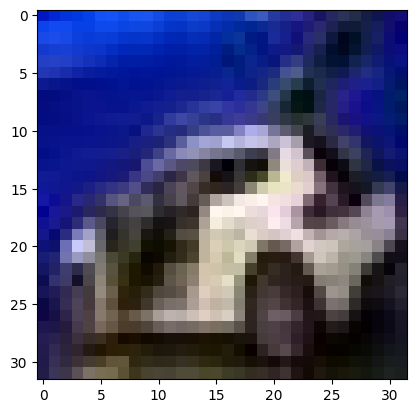

1/1 [==============================] - 0s 132ms/step
Real Image


In [17]:
# write a function to check the model on any image and print the result as if 0 then fake else real

def check_image(image):
    img = cv2.imread(image)
    plt.imshow(img)
    plt.show()
    img = cv2.resize(img,(32,32))
    img = img/255
    img = np.expand_dims(img,axis = 0)
    if np.argmax(model.predict(img)) == 0:
        print('Fake Image')
    else:
        print('Real Image')

check_image("C:\\Users\\amish\\Downloads\\Fake-AI-generated-Image-Detection-main\\Fake-AI-generated-Image-Detection-main\\real-and-ai\\test\\REAL\\0000 (2).jpg")



## **THANK YOU !**

In [18]:
#tf.keras.models.save_model(model,'model.hdf5')

In [19]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
import cv2

st.set_option('deprecation.showfileUploaderEncoding', False)
@st.cache(allow_output_mutation=True)
def load_model():
    model = tf.keras.models.load_model('model.hdf5')
    return model
model = load_model()
st.write("""
            # Fake Image Detection
            """
            )

file = st.file_uploader("Please upload an image file", type=["jpg", "png"])

import cv2

from PIL import Image, ImageOps
import numpy as np
def import_and_predict(image_data, model):

        size = (32,32)
        image = ImageOps.fit(image_data, size, Image.LANCZOS)
        img = np.asarray(image)
        img_reshape = img[np.newaxis,...]
        prediction = model.predict(img_reshape)
        return prediction
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    class_names = ['Fake','Real']
    string = "This image most likely is: "+class_names[np.argmax(predictions)]
    st.success(string)
    

Overwriting app.py


In [20]:
#streamlit run app.py
# Save model architecture to JSON
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)

# Save model weights to HDF5
model.save_weights('model_weights.h5')


In [21]:
from tensorflow.keras.models import model_from_json

# Load the model architecture from JSON
with open('model.json', 'r') as json_file:
    model_json = json_file.read()
loaded_model = model_from_json(model_json)

# Load the model weights
loaded_model.load_weights('model_weights.h5')


In [22]:
export_path = "C://Users//amish//Desktop"
import keras
import tensorflow as tf
from tensorflow.keras import models , layers
# Save the model as a SavedModel
tf.saved_model.save(model, export_path)

INFO:tensorflow:Assets written to: C://Users//amish//Desktop/assets


INFO:tensorflow:Assets written to: C://Users//amish//Desktop/assets


In [23]:
hi

NameError: name 'hi' is not defined